#Other operations
missing data, stats, ...

In [1]:
import numpy as np
import pandas as pd
s = pd.Series([1, 3, 5, np.nan, 6, 8])

dates = pd.date_range('20130101', periods=6)
print(dates)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2013-01-01,-0.549002,0.050608,-1.864996,1.494759
2013-01-02,-0.828538,0.745395,1.758829,-1.133844
2013-01-03,-0.893429,0.494977,1.073774,-0.229792
2013-01-04,-1.236232,1.601236,0.405372,1.001591
2013-01-05,0.054347,1.932383,-0.542998,-0.155610
2013-01-06,1.837986,-1.316099,-1.958693,-1.290765


In [2]:
df2 = pd.DataFrame({'A': 1.,
    'B': pd.Timestamp('20130102'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(["test", "train", "test", "train"]),
    'F': 'foo'})

### Missing data

In [3]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,E
2013-01-01,-0.549002,0.050608,-1.864996,1.494759,1.0
2013-01-02,-0.828538,0.745395,1.758829,-1.133844,1.0
2013-01-03,-0.893429,0.494977,1.073774,-0.229792,NaN
2013-01-04,-1.236232,1.601236,0.405372,1.001591,NaN


In [4]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.549002,0.050608,-1.864996,1.494759,1.0
2013-01-02,-0.828538,0.745395,1.758829,-1.133844,1.0


In [5]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.549002,0.050608,-1.864996,1.494759,1.0
2013-01-02,-0.828538,0.745395,1.758829,-1.133844,1.0
2013-01-03,-0.893429,0.494977,1.073774,-0.229792,5.0
2013-01-04,-1.236232,1.601236,0.405372,1.001591,5.0


In [6]:
pd.isna(df1)


,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Stats

In [7]:
df1.describe()

,A,B,C,D,E
count,4.000000,4.000000,4.000000,4.000000,2.0
mean,-0.876800,0.723054,0.343245,0.283179,1.0
std,0.282400,0.652152,1.572444,1.190957,0.0
min,-1.236232,0.050608,-1.864996,-1.133844,1.0
25%,-0.979130,0.383885,-0.162220,-0.455805,1.0
50%,-0.860983,0.620186,0.739573,0.385900,1.0
75%,-0.758654,0.959356,1.245038,1.124883,1.0
max,-0.549002,1.601236,1.758829,1.494759,1.0


In [8]:
df1.sum()  # default axis=0

A   -3.507200
B    2.892217
C    1.372979
D    1.132715
E    2.000000
dtype: float64

In [9]:
df1.sum(axis=1)

2013-01-01    0.131369
2013-01-02    1.541843
2013-01-03    0.445531
2013-01-04    1.771968
Freq: D, dtype: float64

In [10]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s



2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [11]:
df

,A,B,C,D
2013-01-01,-0.549002,0.050608,-1.864996,1.494759
2013-01-02,-0.828538,0.745395,1.758829,-1.133844
2013-01-03,-0.893429,0.494977,1.073774,-0.229792
2013-01-04,-1.236232,1.601236,0.405372,1.001591
2013-01-05,0.054347,1.932383,-0.542998,-0.155610
2013-01-06,1.837986,-1.316099,-1.958693,-1.290765


In [12]:
df.sub(s, axis='index')  # subtract from dataframe or series

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.893429,-0.505023,0.073774,-1.229792
2013-01-04,-4.236232,-1.398764,-2.594628,-1.998409
2013-01-05,-4.945653,-3.067617,-5.542998,-5.155610
2013-01-06,NaN,NaN,NaN,NaN


### Histogramming

In [13]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

0    3
6    2
3    2
4    1
2    1
1    1
dtype: int64

### String process

In [14]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge
Concat, Join

Concat

In [15]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.365817,-0.839778,0.560350,0.049854
1,0.595951,0.565967,0.262871,-0.531787
2,-0.173601,-0.382230,1.247147,0.203234
3,-4.085303,0.046076,0.356088,0.446631
4,-0.859133,0.842119,0.506681,0.255190
5,-1.092203,0.990656,-1.297791,-0.545628
6,-1.309498,1.641824,-0.568500,0.740479
7,0.557107,-1.561143,-0.443476,-0.540024
8,0.838435,-0.865023,0.713525,-0.498086
9,0.222273,-0.793341,0.269298,-0.145745


In [16]:
pieces = [df[:3], df[3:5], df[5:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.365817,-0.839778,0.560350,0.049854
1,0.595951,0.565967,0.262871,-0.531787
2,-0.173601,-0.382230,1.247147,0.203234
3,-4.085303,0.046076,0.356088,0.446631
4,-0.859133,0.842119,0.506681,0.255190
5,-1.092203,0.990656,-1.297791,-0.545628
6,-1.309498,1.641824,-0.568500,0.740479
7,0.557107,-1.561143,-0.443476,-0.540024
8,0.838435,-0.865023,0.713525,-0.498086
9,0.222273,-0.793341,0.269298,-0.145745


### Join

#### same classes

In [17]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [18]:
right

,key,rval
0,foo,4
1,foo,5


In [19]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


#### different classes

In [20]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Pivot

In [21]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.302553,-1.531998
1,one,B,foo,-1.439290,0.798069
2,two,C,foo,0.322539,0.652425
3,three,A,bar,0.308116,0.655887
4,one,B,bar,0.518278,1.028103
5,one,C,bar,-1.881033,1.225987
6,two,A,foo,0.045851,-1.160072
7,three,B,foo,-0.450297,-0.413974
8,one,C,foo,0.589248,-2.341297
9,one,A,bar,-0.575847,-2.525049


Show in different representation.
- rows are 'A' and 'B'
- columns are 'C'. Classify values with 'C' column classes.
- values are 'D'

In [22]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.575847  0.302553
      B  0.518278 -1.439290
      C -1.881033  0.589248
three A  0.308116       NaN
      B       NaN -0.450297
      C  1.195030       NaN
two   A       NaN  0.045851
      B  0.417475       NaN
      C       NaN  0.322539

### Time series

In [23]:
rng = pd.date_range('1/1/2020', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2020-01-01    24179
Freq: 5T, dtype: int32

Time zone representation

In [24]:
rng = pd.date_range('3/6/2020 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2020-03-06    1.577001
2020-03-07   -1.209458
2020-03-08    0.586394
2020-03-09    0.144529
2020-03-10   -0.882385
Freq: D, dtype: float64

In [25]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2020-03-06 00:00:00+00:00    1.577001
2020-03-07 00:00:00+00:00   -1.209458
2020-03-08 00:00:00+00:00    0.586394
2020-03-09 00:00:00+00:00    0.144529
2020-03-10 00:00:00+00:00   -0.882385
Freq: D, dtype: float64

In [26]:
ts_utc.tz_convert('US/Eastern')

2020-03-05 19:00:00-05:00    1.577001
2020-03-06 19:00:00-05:00   -1.209458
2020-03-07 19:00:00-05:00    0.586394
2020-03-08 20:00:00-04:00    0.144529
2020-03-09 20:00:00-04:00   -0.882385
Freq: D, dtype: float64

In [27]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps.to_timestamp()

2012-01-01    1.100851
2012-02-01   -1.023147
2012-03-01    0.879460
2012-04-01    0.514478
2012-05-01   -2.331432
Freq: MS, dtype: float64

Converting between period and timestamp

In [28]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [29]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.020762
1990-06-01 09:00   -0.387158
1990-09-01 09:00    0.139664
1990-12-01 09:00   -0.058776
1991-03-01 09:00   -2.752749
Freq: H, dtype: float64

### Categoricals

In [30]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [31]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [32]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

second way, creates a new pandas series by default.

In [33]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                              "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [34]:
df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories

In [35]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### Plotting

In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


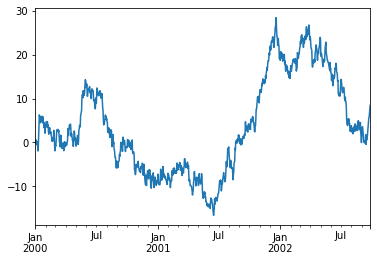

In [36]:
import matplotlib.pyplot as plt
plt.close('all')
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()